<a href="https://colab.research.google.com/github/marcellinus-witarsah/dogs-vs-cats-model/blob/main/dogs-vs-cats-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs Cats Model 
This project is based on competition from Kaggle which can be accessed using this link https://www.kaggle.com/competitions/dogs-vs-cats. This project aimed to create a model that can classify dogs and cats 

In [1]:
import os
import shutil
import sys
# code for making ensuring kaggle.json existed
os.getcwd()
kaggle_json_folder = os.path.join('/root/.kaggle')

if not os.path.exists(kaggle_json_folder):
  os.mkdir(path=kaggle_json_folder)
  print(kaggle_json_folder + " has been created")
else:
  print(kaggle_json_folder + " already exists.")

try:
  source = os.path.join('/content/kaggle.json')
  target = os.path.join(kaggle_json_folder, 'kaggle.json')
  shutil.copy(source, target)
  print("file copied")
except IOError as e:
    print("Unable to copy file. %s" % e)
except:
    print("Unexpected error:", sys.exc_info())


/root/.kaggle already exists.
file copied


## Data Preparation

Pull data from Kaggle using ***kaggle.json*** as its authentication token. Please make sure you have it inside ***/root/.kaggle/kaggle.json***

In [2]:
# download the data
!pip install kaggle
!kaggle competitions download -c dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip the file and put it inside ***/dataset folder***. This extra folder it is just for preference just to make things look neat in the ***/content*** folder.

In [3]:
# open the dogs-vs-cats.zip file
from zipfile import ZipFile

def extract_zip(filepath):
    """
    Function to open a extract zipped file
    """
    # opening the zip file in READ mode
    with ZipFile(filepath, 'r') as zip:
        #printing all the contents of the zip file
        zip.printdir()
        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall(path=os.path.join(dataset_dir))
        print('Done!')

# specifying the zip file name
file_name = "dogs-vs-cats.zip"

dataset_dir = os.path.join("dataset")
if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)
    print(dataset_dir + " has been created")
    
else:
    print(dataset_dir + " already exists")

if not os.path.exists(os.path.join(dataset_dir, file_name)):
    shutil.move(file_name, dataset_dir)
else:
    print("data has already been moved")

# opening the zip file in READ mode
extract_zip(os.path.join(dataset_dir, file_name))
extract_zip(os.path.join(dataset_dir, "train.zip"))
extract_zip(os.path.join(dataset_dir, "test1.zip"))


Streaming output truncated to the last 5000 lines.
test1/550.jpg                                  2013-09-20 10:12:40        11253
test1/5500.jpg                                 2013-09-20 10:15:26        19488
test1/5501.jpg                                 2013-09-20 10:15:26        14965
test1/5502.jpg                                 2013-09-20 10:15:26        14406
test1/5503.jpg                                 2013-09-20 10:15:26        14957
test1/5504.jpg                                 2013-09-20 10:15:26        15065
test1/5505.jpg                                 2013-09-20 10:15:26         2985
test1/5506.jpg                                 2013-09-20 10:15:26         4349
test1/5507.jpg                                 2013-09-20 10:15:26        27502
test1/5508.jpg                                 2013-09-20 10:15:26        54253
test1/5509.jpg                                 2013-09-20 10:15:26         2312
test1/551.jpg                                  2013-09-20 10:12:40   

## Data Exploration
Exploring the data by seeing the image

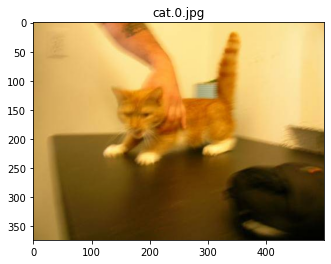

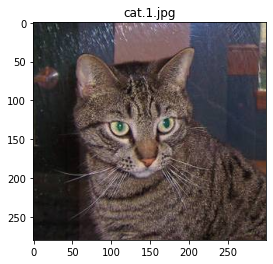

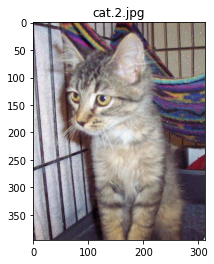

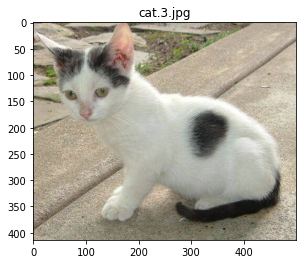

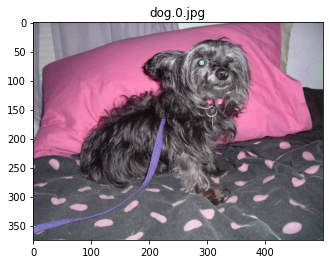

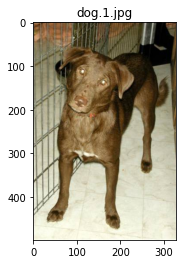

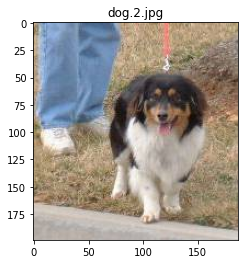

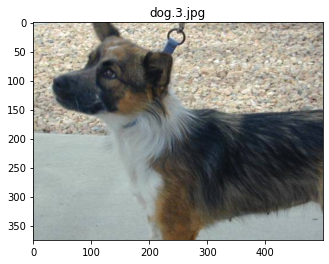

In [4]:
import matplotlib.pyplot as plt

cat_filenames = ['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg']
dog_filenames = ['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg']

for filename in cat_filenames:
  plt.title(filename)
  img = plt.imread(os.path.join('/content/dataset/train', filename))
  plt.imshow(img)
  plt.show()

for filename in dog_filenames:
  plt.title(filename)
  img = plt.imread(os.path.join('/content/dataset/train', filename))
  plt.imshow(img)
  plt.show()

## Data Augmentation
Data augmentationis used to new data of image using different orientation. 

In [5]:
# Create folder based on labels of the data which is cat and dog
# folders
train_folder = '/content/dataset/train'
test1_folder = '/content/dataset/test1'

# filename
cat_folder_name = 'cat'
dog_folder_name = 'dog'

cat_path = os.path.join(train_folder, cat_folder_name)
dog_path = os.path.join(train_folder, dog_folder_name)


def create_folder(path):
  if not os.path.exists(path):
    os.mkdir(path=path)
    print(path + " has been created")
  else:
    print(path + " already exists.")

create_folder(cat_path)
create_folder(dog_path)

for file_name in os.listdir(train_folder):
  destination = os.path.join(train_folder, file_name.split('.')[0], file_name)
  source = os.path.join(train_folder, file_name)

  if file_name == 'dog' or file_name == 'cat':
    continue 

  if not os.path.exists(destination):
    shutil.move(source, destination)
  else:
    print("data has already been moved")

Streaming output truncated to the last 5000 lines.
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been moved
data has already been mov

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Setting a "Global Seed" so that all next operations will be using this seed
tf.random.set_seed(1234)

# Setting constants

TARGET_SIZE = (150, 150)
INPUT_SHAPE = (150, 150, 3)
BATCH_SIZE = 32

image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    # vertical_flip = True,
    # shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    # zoom_range = 0.2,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

In [16]:
print(f"Amount file in training folder = {(len(os.listdir(cat_path)) + len(os.listdir(dog_path)))}")

# create a train generator
train_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    subset = 'training',
    class_mode = 'binary'
) 

# create a validation generator
validation_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    subset = 'validation',
    class_mode = 'binary'
) 

Amount file in training folder = 25000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


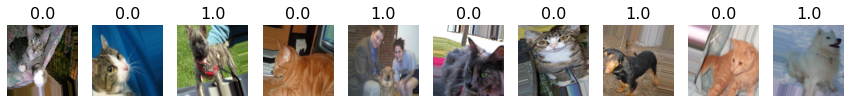

In [17]:
# this part is for seing what is the one-hot-encoding
# that define cat and dog

imgs, labels = next(train_generator)

rows = 1
cols = len(imgs)-22

f = plt.figure(figsize=(15,6))
for i in range(cols):
  sp = f.add_subplot(rows, cols, i+1)
  sp.axis('Off')
  if labels is not None:
    sp.set_title(labels[i], fontsize=16)
  plt.imshow(imgs[i])


From the results above, we can conclude that label ***0.0*** is for ***cat*** and ***1.0*** is for ***dog***

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten


# create model architecture
def get_model(input_shape):
  tf.keras.backend.clear_session()
  return Sequential([
    Conv2D(filters=32, 
           kernel_size=(3,3), 
           activation='relu',
           input_shape=input_shape,
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, 
           kernel_size=(3,3), 
           activation='relu',
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           ),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
  ]
  )

model = get_model(INPUT_SHAPE)

In [24]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# create a model checkpoint which will create a file each time
# validation accuracy is improved.
# This will result the same file being updated with the best
# validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath='/content/best_model_1.hdf5', 
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=0)

model_earlystopping_callback = EarlyStopping(
    monitor='val_loss', 
    patience=5,
)

In [25]:
# compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

# set training and validation size
# training_size = 22500
# validation_size = 2500
callbacks = [model_checkpoint_callback, model_earlystopping_callback]
#train the model
history = model.fit(train_generator,
          steps_per_epoch=150,
          epochs=30,
          validation_data = validation_generator,
          # validation_steps=50,
          callbacks=callbacks,
          verbose=2,
          )

Epoch 1/30
150/150 - 87s - loss: 0.6900 - accuracy: 0.5306 - val_loss: 0.6680 - val_accuracy: 0.5958 - 87s/epoch - 578ms/step
Epoch 2/30
150/150 - 84s - loss: 0.6693 - accuracy: 0.5840 - val_loss: 0.6441 - val_accuracy: 0.6330 - 84s/epoch - 557ms/step
Epoch 3/30
150/150 - 124s - loss: 0.6381 - accuracy: 0.6235 - val_loss: 0.6093 - val_accuracy: 0.6640 - 124s/epoch - 828ms/step
Epoch 4/30
150/150 - 83s - loss: 0.6224 - accuracy: 0.6394 - val_loss: 0.5981 - val_accuracy: 0.6774 - 83s/epoch - 552ms/step
Epoch 5/30
150/150 - 83s - loss: 0.6035 - accuracy: 0.6660 - val_loss: 0.5919 - val_accuracy: 0.6766 - 83s/epoch - 554ms/step
Epoch 6/30
150/150 - 90s - loss: 0.5900 - accuracy: 0.6760 - val_loss: 0.5727 - val_accuracy: 0.7014 - 90s/epoch - 599ms/step
Epoch 7/30
150/150 - 84s - loss: 0.5856 - accuracy: 0.6850 - val_loss: 0.5710 - val_accuracy: 0.7046 - 84s/epoch - 557ms/step
Epoch 8/30
150/150 - 82s - loss: 0.5744 - accuracy: 0.7008 - val_loss: 0.5449 - val_accuracy: 0.7180 - 82s/epoch - 5

In [26]:
def model_diagnostics(history):
  # plot accuracy
  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='training')
  plt.plot(history.history['val_accuracy'], color='orange', label='validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  
  # plot loss
  plt.subplot(212)
  plt.title('Binary Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='training')
  plt.plot(history.history['val_loss'], color='orange', label='validation')
  plt.legend
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

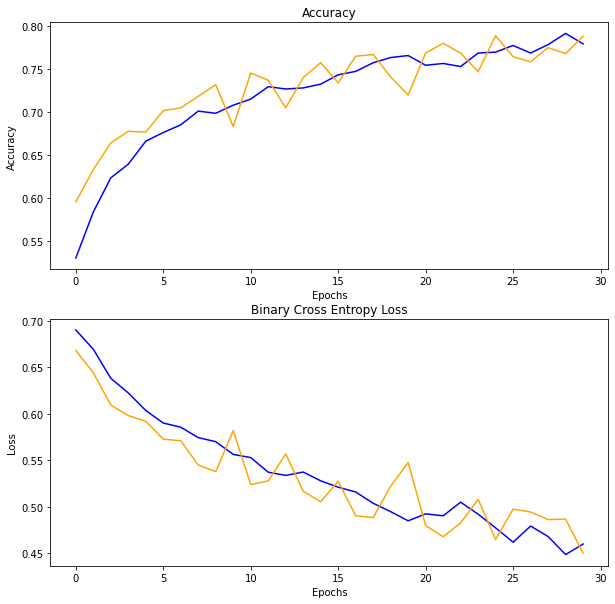

In [27]:
model_diagnostics(history)

The end result the training model only reach the 76% accuracy and 77% validation accuracy. This can be enhance by increasing its epoch. But first I will submit the answer to the competition.

In [43]:
## Predict Test Data for Submission

In [24]:
# # Install Image Package
# !pip install image
# !python3 -m pip install --upgrade pip
# !python3 -m pip install --upgrade Pillow
# !pip install opencv-python


In [26]:
from PIL import Image
import numpy as np
import cv2

test_data = {'filename': [],
             'data':[]}
# rescale and resize the images inside the test1 folder
for filename in os.listdir(test1_folder):
  # img = Image.open(os.path.join(test1_folder, filename)) # open image file
  # img = img.resize(TARGET_SIZE) # resize the image
  # img = np.asarray(img)/255 # rescale the image
  img_array = cv2.imread(os.path.join(test1_folder, filename))
  img_array = cv2.cvtColor(img_array ,cv2.COLOR_BGR2RGB)
  new_array = cv2.resize(img_array, TARGET_SIZE)
  new_array.reshape(-1, TARGET_SIZE[0], TARGET_SIZE[1], 3)
  test_data['filename'].append(filename) # append to an array
  test_data['data'].append(new_array) # append to an array

In [31]:
from keras.models import load_model
from PIL import Image
import numpy as np
# loaded the model
loaded_model = load_model('/content/best_model_1.hdf5')

# predict the data
for data in test_data['data']:
  # print(key, data)
  data = data.reshape(-1, TARGET_SIZE[0], TARGET_SIZE[1], 3)
  print(loaded_model.predict(data))

[[0.]]
[[7.0025474e-22]]
[[1.]]
[[1.]]
[[1.]]
[[0.99486524]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[7.5192713e-19]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[6.0191823e-32]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[3.491823e-29]]
[[0.]]
[[1.]]
[[6.219047e-17]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[3.1626383e-35]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.0852365]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.99998426]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.9913794]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.0484127e-19]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

KeyboardInterrupt: ignored